#**Night Time Light analysis for Navratri day at 0.05x0.05 degree for Gujarat state with cities Ahmedabad, Nadiad, Vadodara, Surat, Rajkot.**
Analysis at day level




In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.use_inf_as_na = True
import numpy as np
import os
import math
from scipy.stats import pearsonr as corr
from matplotlib import pyplot as plt
#import statsmodels.api as sm
import statsmodels.formula.api as sm
import datetime as dt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
NTL_PATH="ntl/data/" # NTL data path
COVID_PATH="covidoxford/data/" # covidoxford path
CITIES_PATH="cities/data/" #cities data path

**total 3418 cities**

In [ ]:
cities_df=pd.read_csv(CITIES_PATH+"cities_0.05degx0.05deg.csv",error_bad_lines=False)
cities_df['population'] = np.where(cities_df['population']==0,10000,cities_df['population'])
print("cities =",len(cities_df))

In [11]:
ntl_df=pd.read_csv(NTL_PATH+"indian_cities_daily_0.05degx0.05deg_ntl.csv")

**Metric Gap_Filled_DNB_BRDF-Corrected_NTL and mean value less than 65535**

In [12]:
metric="Gap_Filled_DNB_BRDF-Corrected_NTL"
metric_df=ntl_df[(ntl_df["metric"]==metric)&(ntl_df["mean"]>=0)&(ntl_df["mean"]<65535)&(~ntl_df["mean"].isna())]

In [13]:
cities=["Ahmedabad","Nadiad","Vadodara","Surat","Rajkot"]

**In 2019 navratri was 29 sept to 7 oct.**<br>
**In 2020 navratri was 17 oct. to 25 oct.**<br>
So 11 days data from 29 sept 2019 and from 17 oct 2020.



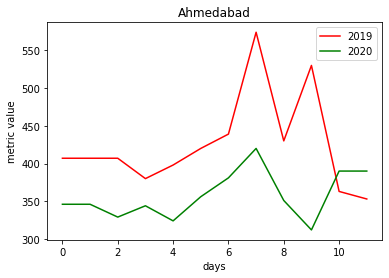

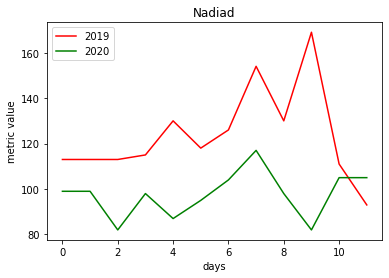

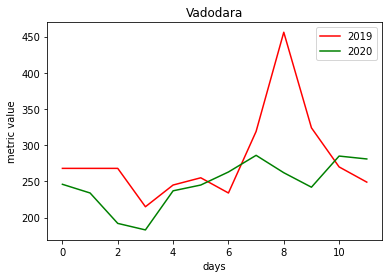

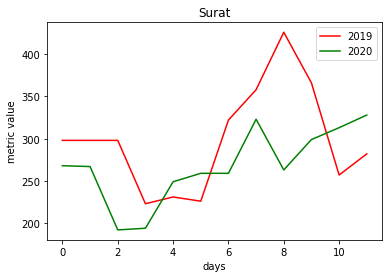

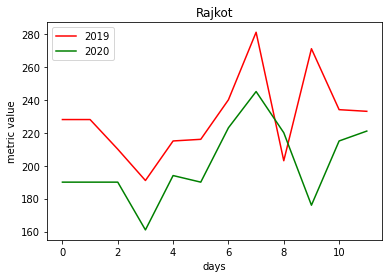

In [14]:
date=dt.datetime(2019,9,28)
weeks=[str(int(date.day))+"."+str(int(date.month))+"."+str(int(date.year))]
for i in range(11):
    date=date+dt.timedelta(days=1)
    weeks.append(str(int(date.day))+"."+str(int(date.month))+"."+str(int(date.year)))
series_2019={}
for city in cities:
    location=cities_df[cities_df["city"]==city]["location"].values[0]
    city_data=metric_df[metric_df["location"]==location].set_index("week")["mean"].to_dict()
    series_2019[city]=[city_data[week] for week in weeks]
date=dt.datetime(2020,10,16)
weeks=[str(int(date.day))+"."+str(int(date.month))+"."+str(int(date.year))]
for i in range(11):
    date=date+dt.timedelta(days=1)
    weeks.append(str(int(date.day))+"."+str(int(date.month))+"."+str(int(date.year)))
series_2020={}
for city in cities:
    location=cities_df[cities_df["city"]==city]["location"].values[0]
    city_data=metric_df[metric_df["location"]==location].set_index("week")["mean"].to_dict()
    series_2020[city]=[city_data[week] for week in weeks]
for city in cities:
    plt.plot(series_2019[city],label="2019",color="red")
    plt.plot(series_2020[city],label="2020",color="green")
    plt.title(city)
    plt.legend()
    plt.xlabel('days')
    plt.ylabel('metric value')
    plt.show()

**Take away**: The clear difference is seen in night time light for naratri days between 2019 and 2020. The day after Navratri ends the curve starts to meet.<br> This type of analysis can be done for other different cities and other big festivals. Like Durga Puja specially in Bengal side, Diwali over different places, Ganesh Chaturthi specially in Maharashtra and at other places.